## Final Project Submission

Please fill out:
* Student name: Carolyne Wambui Kambura
* Student pace: Part time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


 # HOUSE PRICING WITH LINEAR, MULTIPLE REGRESSION

# Business Problem 🤔

One of the greatest factors that influence the buying and selling of homes is price. In this study, I will look at a dataset from King County to see what factors influence buying and selling price of a home to help both a homeoweners make informed pricing decisions and home buyers get insight on market price trends and budget to set.

# Objectives ✍🏽

👉🏽 This notebook aims to:
- Explore and preprocess the data for regression models
- Build regression models with different experiments

# 👩🏽‍💻 Machine Learning models to be explored in this project are:

1. Linear regression
2. Multiple regression
3. Polynomial regression

# Feature Columns 🕵🏽‍♀️

- id - Unique ID for each home sold
- date - Date of the home sale
- price - Price of each home sold
- bedrooms - Number of bedrooms
- bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
- sqft_living - Square footage of the apartments interior living space
- sqft_lot - Square footage of the land space
- floors - Number of floors
- waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
- view - An index from 0 to 4 of how good the view of the property was
- condition - An index from 1 to 5 on the condition of the apartment,
- grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
- sqft_above - The square footage of the interior housing space that is above ground level
- sqft_basement - The square footage of the interior housing space that is below ground level
- yr_built - The year the house was initially built
- yr_renovated - The year of the house’s last renovation
- zipcode - What zipcode area the house is in
- lat - Lattitude
- long - Longitude
- sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
- sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) # setting ignore as a parameter and further adding category

# Obtaining Data

In [114]:
#Load the data as a data frame
df = pd.read_csv("data/kc_house_data.csv")
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.51,-122.26,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.72,-122.32,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.74,-122.23,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.52,-122.39,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.62,-122.05,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.70,-122.35,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.51,-122.36,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.59,-122.30,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.53,-122.07,1410,1287


In [4]:
#Check the shape of the data
df.shape

(21597, 21)

# Scrubbing Data

In [5]:
#Check the data summary to understand the data i.e. non-null values, data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [6]:
#Check for missing values
df.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [7]:
# From the summary, waterfront, view and yr_renovated have missing values

In [8]:
#Check for Unique values
for dataset in df:
    print('For {},{} unique values present'.format(dataset,df[dataset].nunique()))

For id,21420 unique values present
For date,372 unique values present
For price,3622 unique values present
For bedrooms,12 unique values present
For bathrooms,29 unique values present
For sqft_living,1034 unique values present
For sqft_lot,9776 unique values present
For floors,6 unique values present
For waterfront,2 unique values present
For view,5 unique values present
For condition,5 unique values present
For grade,11 unique values present
For sqft_above,942 unique values present
For sqft_basement,304 unique values present
For yr_built,116 unique values present
For yr_renovated,70 unique values present
For zipcode,70 unique values present
For lat,5033 unique values present
For long,751 unique values present
For sqft_living15,777 unique values present
For sqft_lot15,8682 unique values present


In [9]:
df["yr_renovated"].value_counts()

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [ ]:
# we see yr_renovated has 3842 missing values and when explored further there's an year 0.0 with 17011 values. 
#With this we will not analyse yr_renovated further

In [10]:
# Set id as the index
df = df.set_index("id")
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,3,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,3,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,3,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007


In [11]:
#Check statistics of each column
pd.set_option("precision", 2)
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
price,21597.0,5.40e+05,367368.14,78000.00,322000.00,450000.00,645000.00,7.70e+06
bedrooms,21597.0,3.37e+00,0.93,1.00,3.00,3.00,4.00,3.30e+01
bathrooms,21597.0,2.12e+00,0.77,0.50,1.75,2.25,2.50,8.00e+00
sqft_living,21597.0,2.08e+03,918.11,370.00,1430.00,1910.00,2550.00,1.35e+04
sqft_lot,21597.0,1.51e+04,41412.64,520.00,5040.00,7618.00,10685.00,1.65e+06
floors,21597.0,1.49e+00,0.54,1.00,1.00,1.50,2.00,3.50e+00
waterfront,19221.0,7.60e-03,0.09,0.00,0.00,0.00,0.00,1.00e+00
view,21534.0,2.34e-01,0.77,0.00,0.00,0.00,0.00,4.00e+00
condition,21597.0,3.41e+00,0.65,1.00,3.00,3.00,4.00,5.00e+00
grade,21597.0,7.66e+00,1.17,3.00,7.00,7.00,8.00,1.30e+01


# Feature engineering

In [12]:
print(df.dtypes)

date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront       float64
view             float64
condition          int64
grade              int64
sqft_above         int64
sqft_basement     object
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


In [13]:
# Convert data type for price, bathrooms and floors from float to integers.
df.price = df.price.astype(int)
df.bathrooms = df.bathrooms.astype(int)
df.floors = df.floors.astype(int)
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,10/13/2014,221900,3,1,1180,5650,1,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.51,-122.26,1340,5650
6414100192,12/9/2014,538000,3,2,2570,7242,2,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.72,-122.32,1690,7639
5631500400,2/25/2015,180000,2,1,770,10000,1,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.74,-122.23,2720,8062
2487200875,12/9/2014,604000,4,3,1960,5000,1,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.52,-122.39,1360,5000
1954400510,2/18/2015,510000,3,2,1680,8080,1,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.62,-122.05,1800,7503


# Check for Distribution of each variable using histograms

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'bathrooms'}>],
       [<AxesSubplot:title={'center':'sqft_living'}>,
        <AxesSubplot:title={'center':'sqft_lot'}>,
        <AxesSubplot:title={'center':'floors'}>,
        <AxesSubplot:title={'center':'waterfront'}>],
       [<AxesSubplot:title={'center':'view'}>,
        <AxesSubplot:title={'center':'condition'}>,
        <AxesSubplot:title={'center':'grade'}>,
        <AxesSubplot:title={'center':'sqft_above'}>],
       [<AxesSubplot:title={'center':'yr_built'}>,
        <AxesSubplot:title={'center':'yr_renovated'}>,
        <AxesSubplot:title={'center':'zipcode'}>,
        <AxesSubplot:title={'center':'lat'}>],
       [<AxesSubplot:title={'center':'long'}>,
        <AxesSubplot:title={'center':'sqft_living15'}>,
        <AxesSubplot:title={'center':'sqft_lot15'}>, <AxesSubplot:>]],
      dtype=objec

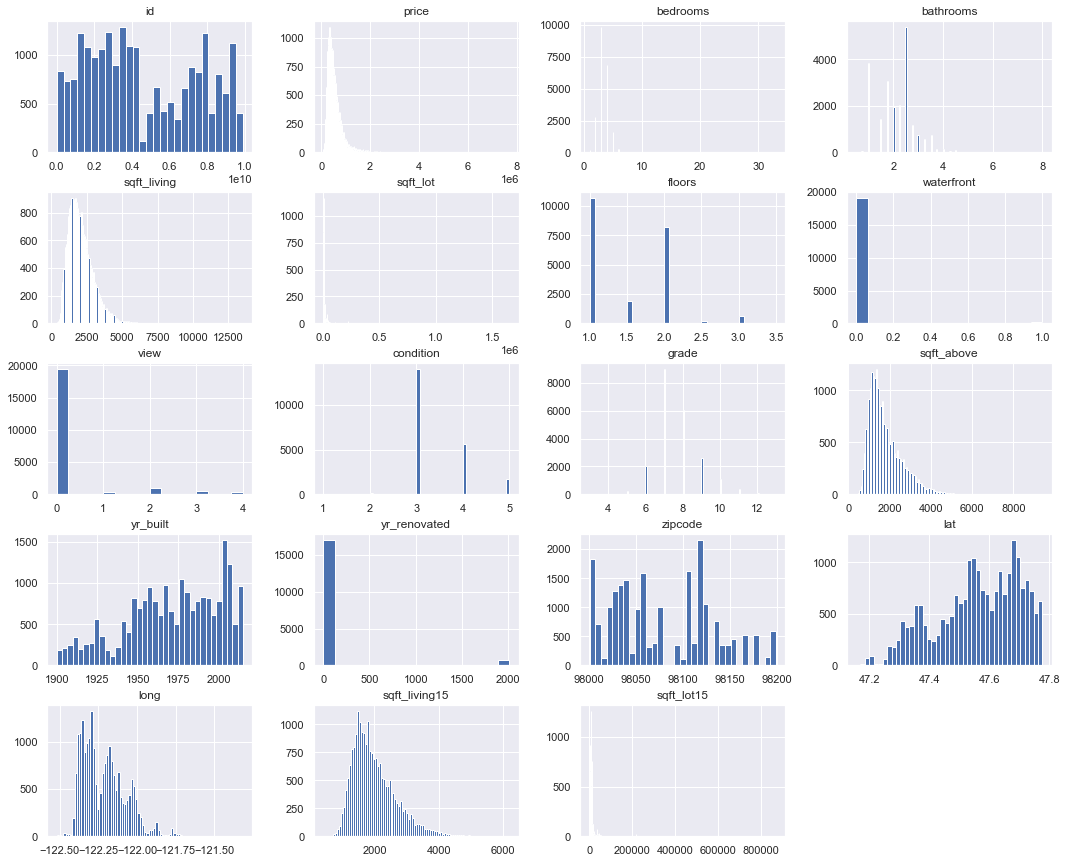

In [63]:
df.hist(figsize=(18,15), bins='auto')

In [15]:
#Observations

#price, sqft_lot, sqft_living, sqft_above, long,sqft_living15 and sqft_lot15 are all continuous and appear to be 
#log normally distributed.
# Most houses have 3 bedrooms and 2 bathrooms
#Most houses were built in the early 2000s

Let's have a look at our target feature "price", the histogram shows that the data is positively skewed and deviates from the normal distribution.

Text(0.5, 1.0, 'Distribution of Price')

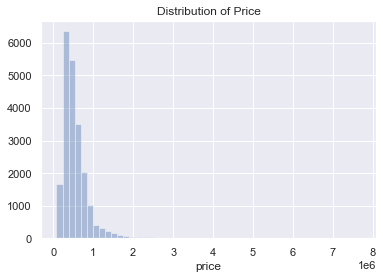

In [66]:
#histogram
sns.distplot(df['price'], bins=50, kde=False);
plt.title("Distribution of Price")

In [65]:
#Analyse "price" for skweness and kurtosis
print("Skewness: %f" % df['price'].skew())
print("Kurtosis: %f" % df['price'].kurt())

Skewness: 4.023365
Kurtosis: 34.541359


In [ ]:
# From the result we can see that the data is >1 which means that it is positively skewed(highly skewed) and the 
#kurtosis is > 3 which means that it is Leptokurtic meaning we have more outliers.

We will normalize our target feature "price" during data standardization together with the identified top features that influence price

# Feature Exploration

Conduct Multivariate analysis to understand check on how the different features relate to each other

Let's see a general overview of the relationship between each feature when using bedroom as a hue

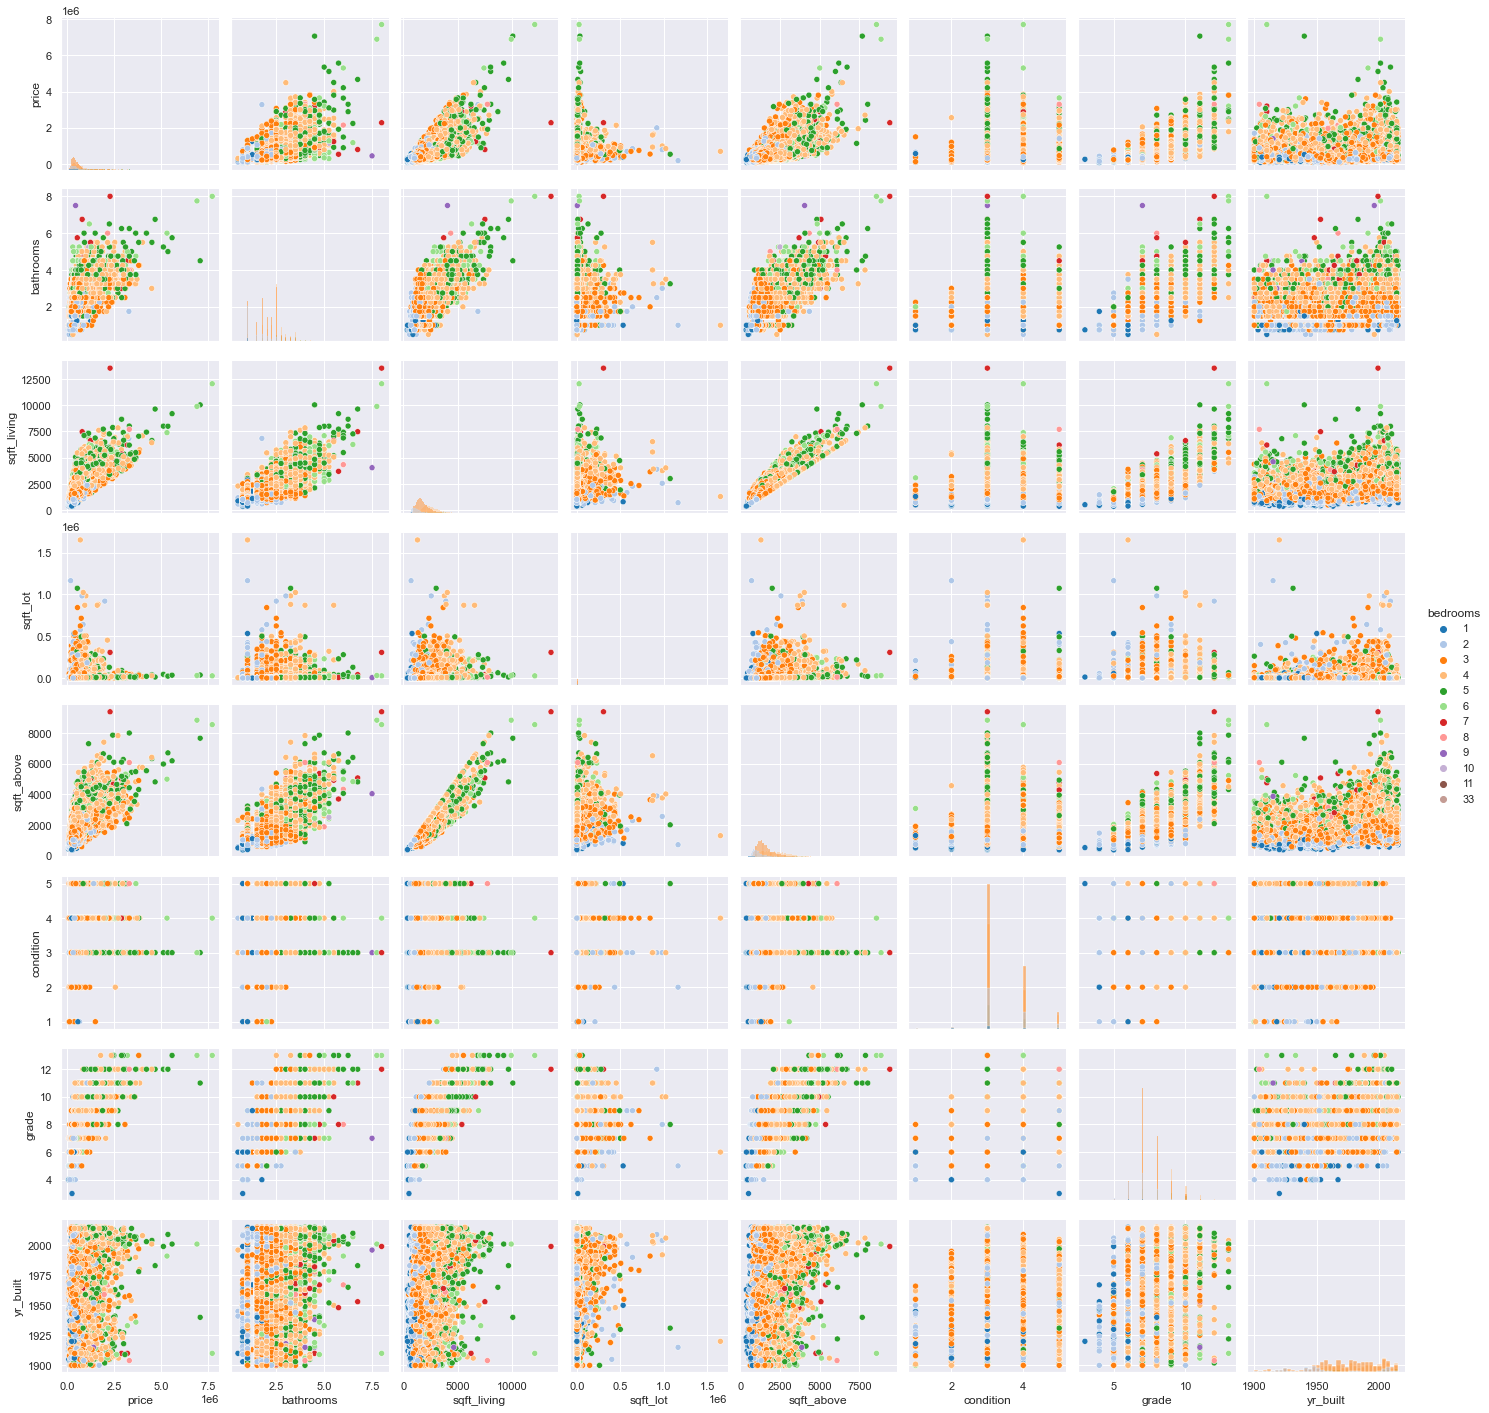

In [68]:
sns.pairplot(df[["price", "bedrooms","bathrooms","sqft_living","sqft_lot","sqft_above","condition","grade","yr_built"]],
             hue="bedrooms", palette='tab20', diag_kind="hist", height=2.5)

In [17]:
#Observations
#The data is a mix of both numerical and categorical data
#From the pairplot we can see a linear relationship between sqft_living, bathrooms,"sqft_lot", & "sqft_above" with price

Let's explore the relationship between a few features that have been observed to have a linear relationship with price

In [18]:
# let's start with the categorical data 
# let's use bar graph to see how the relationship looks like with price

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

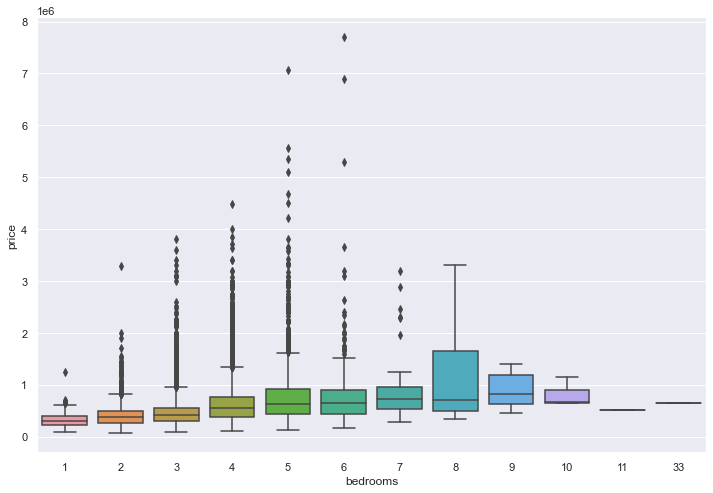

In [69]:
plt.figure(figsize=(12,8))
sns.boxplot(x='bedrooms',y='price',data=df)

In [253]:
#Handling bedrooms outliers
Q1 = df['bedrooms'].quantile(0.25)
Q3 = df['bedrooms'].quantile(0.75)
print('Q1:',Q1)
print('Q3: ',Q3)

IQR = Q3-Q1
print('IQR: ',IQR)

lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
print('Lower limit: ',lower_limit)
print('Upper limit: ',upper_limit)

df['bedrooms'] = np.where(df['bedrooms']>upper_limit,upper_limit,df['bedrooms'])
df['bedrooms'] = np.where(df['bedrooms']<lower_limit,lower_limit,df['bedrooms'])

Q1: 3.0
Q3:  4.0
IQR:  1.0
Lower limit:  1.5
Upper limit:  5.5


<AxesSubplot:xlabel='bathrooms', ylabel='price'>

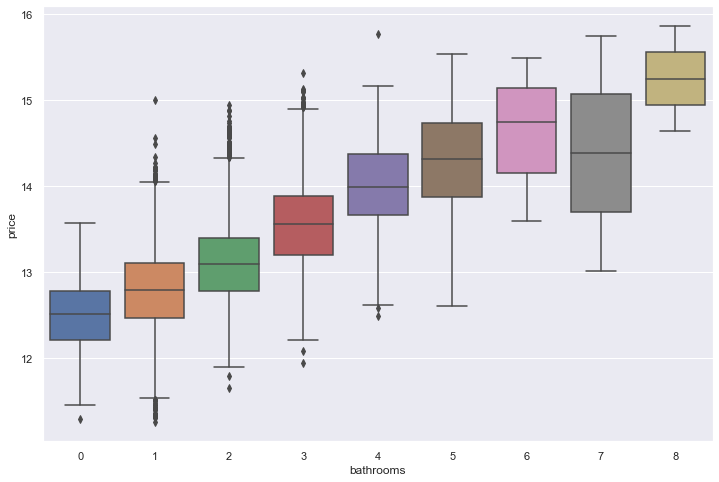

In [257]:
df.bathrooms = df.bathrooms.astype(int)
plt.figure(figsize=(12,8))
sns.boxplot(x='bathrooms',y='price',data=df)

In [260]:
#Handling bedrooms outliers
Q1 = df['bathrooms'].quantile(0.25)
Q3 = df['bathrooms'].quantile(0.75)
print('Q1:',Q1)
print('Q3: ',Q3)

IQR = Q3-Q1
print('IQR: ',IQR)

lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
print('Lower limit: ',lower_limit)
print('Upper limit: ',upper_limit)

df['bathrooms'] = np.where(df['bathrooms']>upper_limit,upper_limit,df['bathrooms'])
df['bathrooms'] = np.where(df['bathrooms']<lower_limit,lower_limit,df['bathrooms'])

Q1: 1.0
Q3:  2.0
IQR:  1.0
Lower limit:  -0.5
Upper limit:  3.5


<AxesSubplot:xlabel='condition', ylabel='price'>

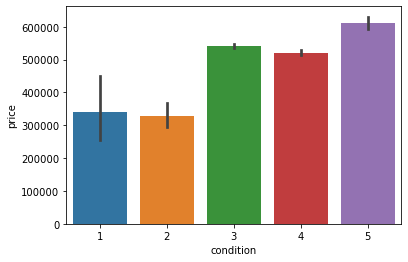

In [19]:
sns.barplot(x="condition", y="price", data=df)  

<AxesSubplot:xlabel='condition', ylabel='price'>

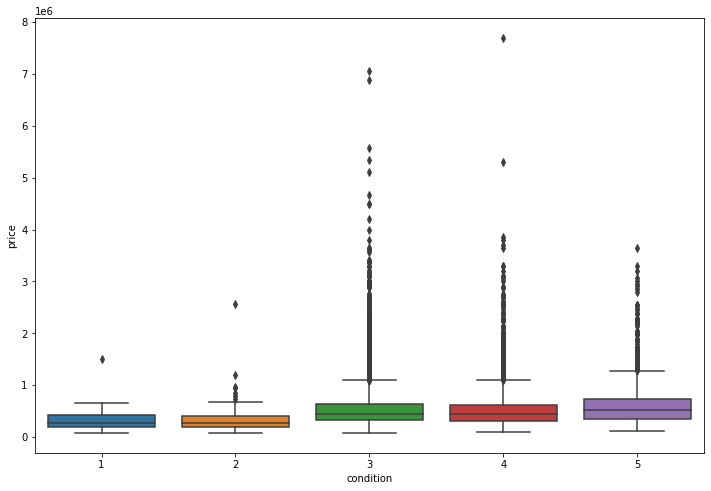

In [20]:
plt.figure(figsize=(12,8))
sns.boxplot(x='condition',y='price',data=df)

In [258]:
#Handling condition outliers
Q1 = df['condition'].quantile(0.25)
Q3 = df['condition'].quantile(0.75)
print('Q1:',Q1)
print('Q3: ',Q3)

IQR = Q3-Q1
print('IQR: ',IQR)

lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
print('Lower limit: ',lower_limit)
print('Upper limit: ',upper_limit)

df['condition'] = np.where(df['condition']>upper_limit,upper_limit,df['condition'])
df['condition'] = np.where(df['condition']<lower_limit,lower_limit,df['condition'])

Q1: 3.0
Q3:  4.0
IQR:  1.0
Lower limit:  1.5
Upper limit:  5.5


In [21]:
#From the observations houses rated condition 5 have the highest prices

<AxesSubplot:xlabel='grade', ylabel='price'>

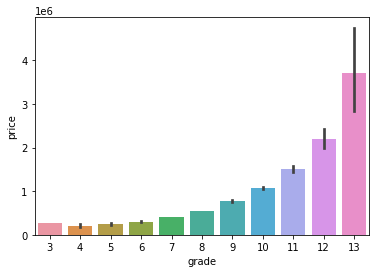

In [22]:
sns.barplot(x="grade", y="price", data=df) 

<AxesSubplot:xlabel='grade', ylabel='price'>

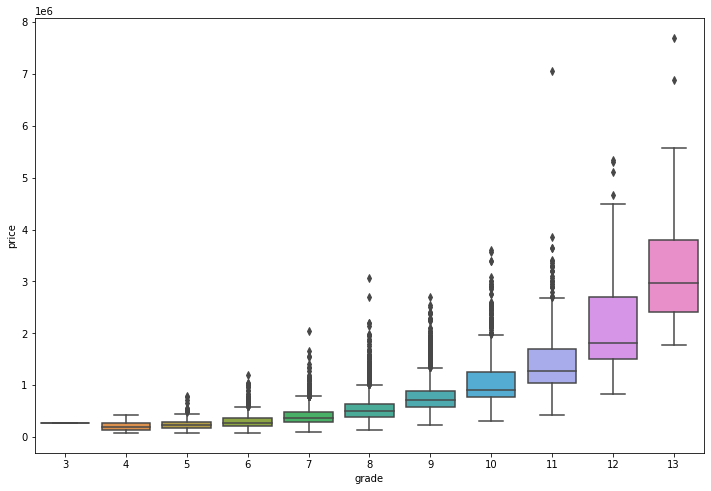

In [23]:
plt.figure(figsize=(12,8))
sns.boxplot(x='grade',y='price',data=df)

In [259]:
#Handling grade outliers
Q1 = df['grade'].quantile(0.25)
Q3 = df['grade'].quantile(0.75)
print('Q1:',Q1)
print('Q3: ',Q3)

IQR = Q3-Q1
print('IQR: ',IQR)

lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
print('Lower limit: ',lower_limit)
print('Upper limit: ',upper_limit)

df['grade'] = np.where(df['grade']>upper_limit,upper_limit,df['grade'])
df['grade'] = np.where(df['grade']<lower_limit,lower_limit,df['grade'])

Q1: 7.0
Q3:  8.0
IQR:  1.0
Lower limit:  5.5
Upper limit:  9.5


In [24]:
#From a general observation houses graded highly have higher prices

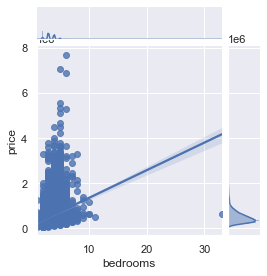

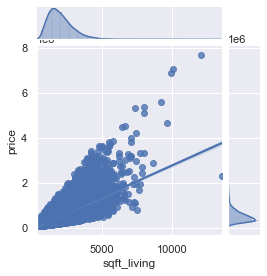

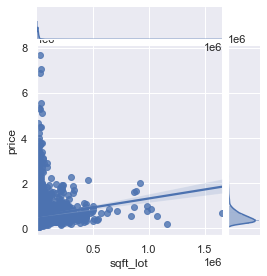

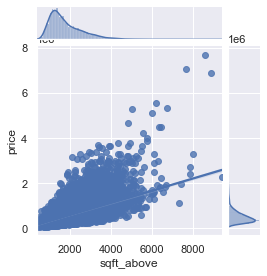

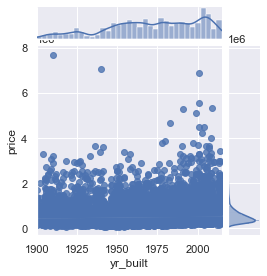

In [45]:
#lets explore the linear data
sns.jointplot(x='sqft_living',y='price',data=df,kind='reg',height=4)
sns.jointplot(x='sqft_lot',y='price',data=df,kind='reg',height=4)
sns.jointplot(x='sqft_above',y='price',data=df,kind='reg',height=4)
sns.jointplot(x='yr_built',y='price',data=df,kind='reg',height=4)

It's interesting that yr_built does not have any relationship to price, one would assume that the newer houses would be more
expensive

Curious does age of the house influence price?

Let's transform the date column

In [79]:
from datetime import datetime
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

In [80]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,1955,0.0,98178,47.51,-122.26,1340,5650,2014,10,13
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,1951,1991.0,98125,47.72,-122.32,1690,7639,2014,12,9
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,1933,NaN,98028,47.74,-122.23,2720,8062,2015,2,25
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,1965,0.0,98136,47.52,-122.39,1360,5000,2014,12,9
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,1987,0.0,98074,47.62,-122.05,1800,7503,2015,2,18


In [81]:
#let's create a house_age column to help us see how this influences price
df["house_age"] = df["year"] - df["yr_built"]
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day,house_age
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,0.0,98178,47.51,-122.26,1340,5650,2014,10,13,59
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,1991.0,98125,47.72,-122.32,1690,7639,2014,12,9,63
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,NaN,98028,47.74,-122.23,2720,8062,2015,2,25,82
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,0.0,98136,47.52,-122.39,1360,5000,2014,12,9,49
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,0.0,98074,47.62,-122.05,1800,7503,2015,2,18,28


<AxesSubplot:xlabel='price', ylabel='house_age'>

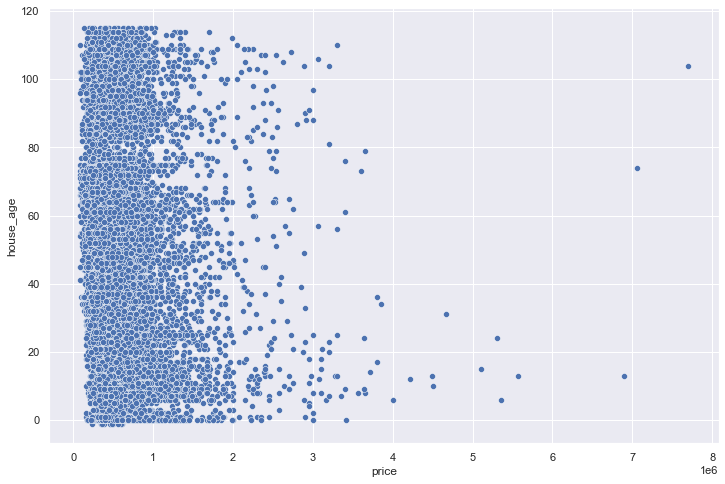

In [82]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='house_age',data=df)

In [83]:
df[["price", "house_age"]].corr(method = "pearson")

,price,house_age
price,1.00,-0.05
house_age,-0.05,1.00


In [40]:
#There is a weak negative correlation which means as house_age increases price decreases slightly and vice versa

# Check for correlations

In [84]:
df[["price", "bedrooms","bathrooms","sqft_living","sqft_lot","sqft_above","condition","grade","yr_built"]].corr(method = "pearson")

,price,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,condition,grade,yr_built
price,1.00,0.31,0.53,0.70,8.99e-02,0.61,3.61e-02,0.67,0.05
bedrooms,0.31,1.00,0.51,0.58,3.25e-02,0.48,2.65e-02,0.36,0.16
bathrooms,0.53,0.51,1.00,0.76,8.84e-02,0.69,-1.26e-01,0.67,0.51
sqft_living,0.70,0.58,0.76,1.00,1.73e-01,0.88,-5.94e-02,0.76,0.32
sqft_lot,0.09,0.03,0.09,0.17,1.00e+00,0.18,-8.83e-03,0.11,0.05
sqft_above,0.61,0.48,0.69,0.88,1.84e-01,1.00,-1.59e-01,0.76,0.42
condition,0.04,0.03,-0.13,-0.06,-8.83e-03,-0.16,1.00e+00,-0.15,-0.36
grade,0.67,0.36,0.67,0.76,1.15e-01,0.76,-1.47e-01,1.00,0.45
yr_built,0.05,0.16,0.51,0.32,5.29e-02,0.42,-3.62e-01,0.45,1.00


In [85]:
#Correlation of 0.7-0.8 or higher is considered a high correlation, so I have set 0.70 as the cut-off
abs(df[["price", "bedrooms","bathrooms","sqft_living","sqft_lot","sqft_above","condition","grade","yr_built"]]
        .corr()) > 0.70

,price,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,condition,grade,yr_built
price,True,False,False,True,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False
bathrooms,False,False,True,True,False,False,False,False,False
sqft_living,True,False,True,True,False,True,False,True,False
sqft_lot,False,False,False,False,True,False,False,False,False
sqft_above,False,False,False,True,False,True,False,True,False
condition,False,False,False,False,False,False,True,False,False
grade,False,False,False,True,False,True,False,True,False
yr_built,False,False,False,False,False,False,False,False,True


In [28]:
#price, sqft_living have a high correlation
#sqft_living, sqft_above, grade have a high correlation

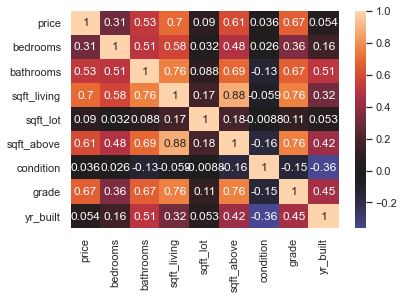

In [86]:
sns.heatmap(df[["price", "bedrooms","bathrooms","sqft_living","sqft_lot","sqft_above","condition", "grade","yr_built"]]
            .corr(), center=0, annot = True);

The Orange colors represent high correlations

# What are the top 3 features that Influence Price of a House

In [87]:
#Pick the top 3 variables with a relationship with price
correlation = df.corr(method='pearson')
columns = correlation.nlargest(4, 'price').index
columns

Index(['price', 'sqft_living', 'grade', 'sqft_above'], dtype='object')

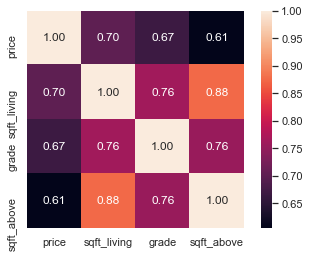

In [88]:
correlation_map = np.corrcoef(df[columns].values.T)
sns.set(font_scale=1.0)
heatmap = sns.heatmap(correlation_map, cbar=True, annot=True, square=True, fmt='.2f', yticklabels=columns.values, xticklabels=columns.values)

plt.show()

In [32]:
#In order sqft_living, grade, sqft_above are the top 3 features that influence house prices
#We can also observe that the three features also correlate with each other.
#It actually does make sense that as the sqft_living increases, the sqft_above,and grade increases
#It is safe to assume that the grade of the house is influenced by sqft_living and sqft_above which then
#directly influences price

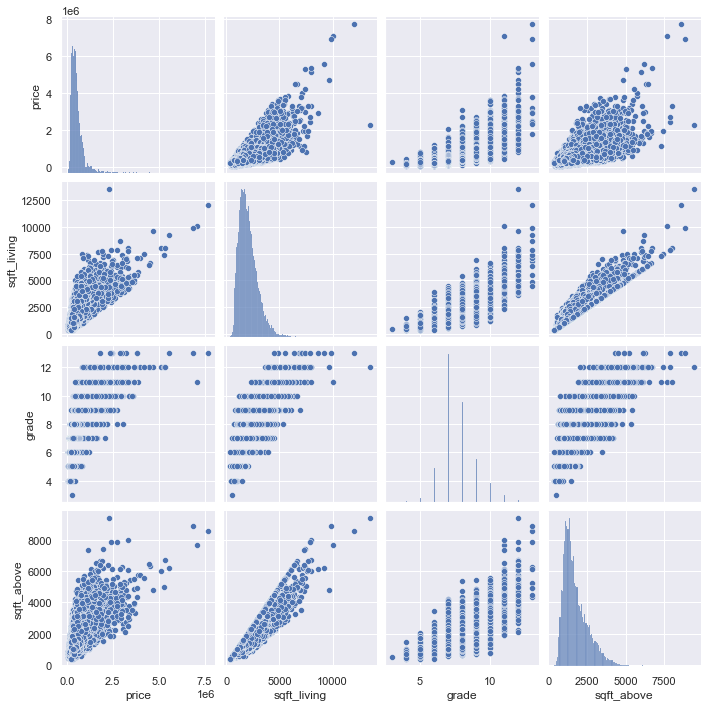

In [77]:
#scatterplot
sns.set()
feats = ['price', 'sqft_living', 'grade', 'sqft_above']
sns.pairplot(df[feats], height = 2.5)
plt.show();

The scatterplots confirm the findings of the heatmap i.e. their is a myriad linear correlation between sqft_living, grade, sqft_above. From the observation the three features have the greatest impact on price. We could also assume that location does have influence on price, we will try and analyze that with a different tool (tableau) as the data is in lat/long.

In [89]:
df[["sqft_living","sqft_above", "grade"]].corr(method = "pearson")

,sqft_living,sqft_above,grade
sqft_living,1.00,0.88,0.76
sqft_above,0.88,1.00,0.76
grade,0.76,0.76,1.00


# Standardization of Data

From earlier observation we saw that price needed to be standardized

In [116]:
#standardizing data to mitigate skewdness and kurtosis
from sklearn.preprocessing import StandardScaler
price_scaled = StandardScaler().fit_transform(df['price'][:,np.newaxis]);
low_range = price_scaled[price_scaled[:,0].argsort()][:10]
high_range= price_scaled[price_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.25843051]
 [-1.25298626]
 [-1.25026413]
 [-1.247542  ]
 [-1.24618094]
 [-1.24481987]
 [-1.24209774]
 [-1.23937562]
 [-1.23937562]
 [-1.23529242]]

outer range (high) of the distribution:
[[10.75159884]
 [10.77882013]
 [11.24158191]
 [12.43931829]
 [12.95652264]
 [13.09262905]
 [13.69149724]
 [17.28470638]
 [17.74746817]
 [19.48963018]]


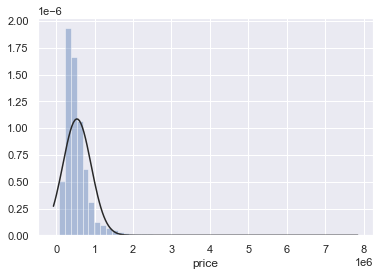

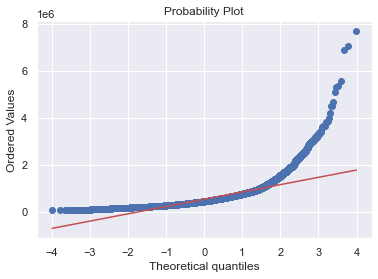

In [117]:
from scipy.stats import norm
from scipy import stats
#histogram and normal probability plot
sns.distplot(df["price"], fit=norm, bins=50, kde=False);
fig = plt.figure()
res = stats.probplot(df["price"], plot=plt)

In [118]:
df['price'] = np.log(df['price'])

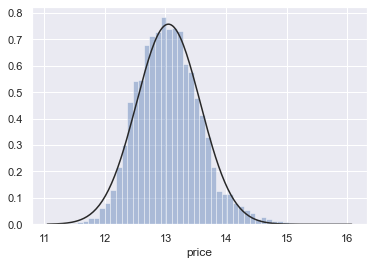

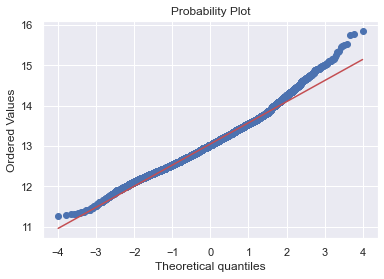

In [119]:
#histogram
sns.distplot(df['price'], fit=norm, bins=50, kde=False);
fig = plt.figure()
res = stats.probplot(df['price'], plot=plt)

sqft_living is among the top 2 features that influence price, however, the from the general observation it is positively skewed

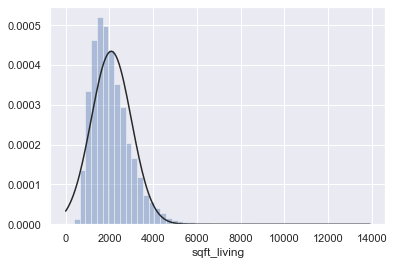

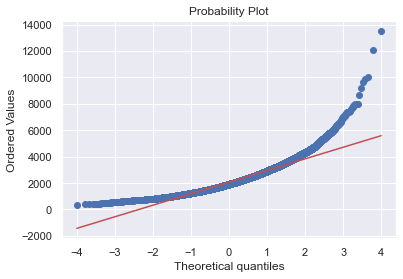

In [127]:
#histogram
sns.distplot(df['sqft_living'], fit=norm, bins=50, kde=False);
fig = plt.figure()
res = stats.probplot(df['sqft_living'], plot=plt)

In [128]:
#let's standardize sqft_living 
df['sqft_living'] = np.log(df['sqft_living'])

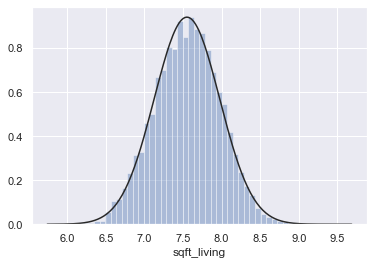

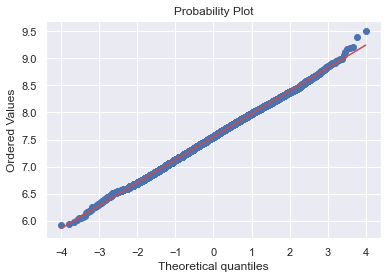

In [129]:
#histogram
sns.distplot(df['sqft_living'], fit=norm, bins=50, kde=False);
fig = plt.figure()
res = stats.probplot(df['sqft_living'], plot=plt)

In [172]:
#let's standardize sqft_lot 
df['sqft_lot'] = np.log(df['sqft_lot'])

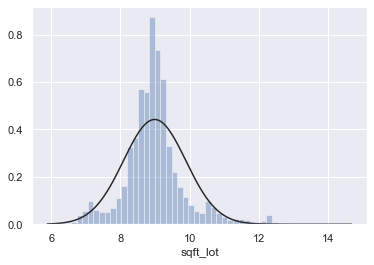

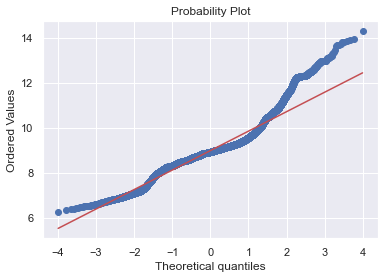

In [173]:
#histogram
sns.distplot(df['sqft_lot'], fit=norm, bins=50, kde=False);
fig = plt.figure()
res = stats.probplot(df['sqft_lot'], plot=plt)

# REGRESSION MODELLING
The attributes to be used for the regression model are the top 3 features we identified earlier on i.e. sqft_living, grade, sqft_above. The correlation analysis of the three features shows a strong positive correlation i.e. as one variable increases, the other variable increases. To address the multicollinearity, we have to decide on the 2 best feature and later drop 1 that we will proceed with.

In [249]:
#let's drop all the columns that have no relationship to price
df1=df.drop(["date","yr_renovated","zipcode","lat","long","view","sqft_living15","sqft_lot15","sqft_basement",
             "sqft_above","waterfront","yr_built"], axis=1)
df1

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade
0,7129300520,12.31,3,1.00,7.07,8.64,1.0,3,7
1,6414100192,13.20,3,2.25,7.85,8.89,2.0,3,7
2,5631500400,12.10,2,1.00,6.65,9.21,1.0,3,6
3,2487200875,13.31,4,3.00,7.58,8.52,1.0,5,7
4,1954400510,13.14,3,2.00,7.43,9.00,1.0,3,8
...,...,...,...,...,...,...,...,...,...
21592,263000018,12.79,3,2.50,7.33,7.03,3.0,3,8
21593,6600060120,12.90,4,2.50,7.75,8.67,2.0,3,8
21594,1523300141,12.90,2,0.75,6.93,7.21,2.0,3,7
21595,291310100,12.90,3,2.50,7.38,7.78,2.0,3,8


In [175]:
#Let's check for Multicollinearity

df_corr = df1.corr().abs().stack().reset_index().sort_values(0, ascending=False)

df_corr['pairs'] = list(zip(df_corr.level_0, df_corr.level_1))

df_corr.set_index(['pairs'], inplace = True)

df_corr.drop(columns=['level_1', 'level_0'], inplace = True)

# cc for correlation coefficient
df_corr.columns = ['cc']

df_corr.drop_duplicates(inplace=True)

df_corr[(df_corr.cc>.75) & (df_corr.cc<1)]


,cc
pairs,
"(bathrooms, sqft_living)",0.76


sqft_living and bathrooms are positively correlated i.e. as one increases the other one increases
I will drop bathrooms, and proceed with sqft_living.

In [250]:
df_mod=df1.drop(["bathrooms"], axis = 1)
df_mod.head()

,id,price,bedrooms,sqft_living,sqft_lot,floors,condition,grade
0,7129300520,12.31,3,7.07,8.64,1.0,3,7
1,6414100192,13.20,3,7.85,8.89,2.0,3,7
2,5631500400,12.10,2,6.65,9.21,1.0,3,6
3,2487200875,13.31,4,7.58,8.52,1.0,5,7
4,1954400510,13.14,3,7.43,9.00,1.0,3,8


In [177]:
#Convert floors to integers
df_mod.floors = df_mod.floors.astype(int)
df_mod

,id,price,bedrooms,sqft_living,sqft_lot,floors,condition,grade
0,7129300520,12.31,3,7.07,8.64,1,3,7
1,6414100192,13.20,3,7.85,8.89,2,3,7
2,5631500400,12.10,2,6.65,9.21,1,3,6
3,2487200875,13.31,4,7.58,8.52,1,5,7
4,1954400510,13.14,3,7.43,9.00,1,3,8
...,...,...,...,...,...,...,...,...
21592,263000018,12.79,3,7.33,7.03,3,3,8
21593,6600060120,12.90,4,7.75,8.67,2,3,8
21594,1523300141,12.90,2,6.93,7.21,2,3,7
21595,291310100,12.90,3,7.38,7.78,2,3,8


We know that our dataset contains categorical data, let's explore each feature and create dummies to be able to fit the columns into regression models.

Before we create the dummies, let's work  on a simple linear regression model for the two continous features first

NB : LINEAR REGRESSION Assumptions -Linearity -Normality -Homoscedasticity Before I consider a linear model, let's see if all the assumptions have been met.
(From initial visualization we've observed linear relationships/positive correlation between the different features with price)

Simple Linear regression

In [252]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# build the formula 
f = 'price~sqft_living'
# create a fitted model in one line
model = smf.ols(formula=f, data=df_mod).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.455
Model:                            OLS   Adj. R-squared:                  0.455
Method:                 Least Squares   F-statistic:                 1.805e+04
Date:                Sun, 26 Mar 2023   Prob (F-statistic):               0.00
Time:                        12:44:22   Log-Likelihood:                -10231.
No. Observations:               21597   AIC:                         2.047e+04
Df Residuals:                   21595   BIC:                         2.048e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       6.7234      0.047    142.612      

R2 of 45% means the model is only able to account for 45% of the total variation in the dependent variable, while the remaining
55% is due to other factors not included in the model or random error.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


   sqft_living
0         5.91
1         9.51
0    11.68
1    14.69
dtype: float64


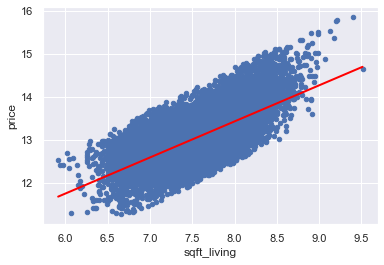

In [147]:
# create a DataFrame with the minimum and maximum values of TV
X_new = pd.DataFrame({'sqft_living': [df_mod.sqft_living.min(), df_mod.sqft_living.max()]})
print(X_new.head())

# make predictions for those x values and store them
preds = model.predict(X_new)
print (preds)

# first, plot the observed data and the least squares line
df_mod.plot(kind='scatter', x='sqft_living', y='price')
plt.plot(X_new, preds, c='red', linewidth=2)
plt.show()

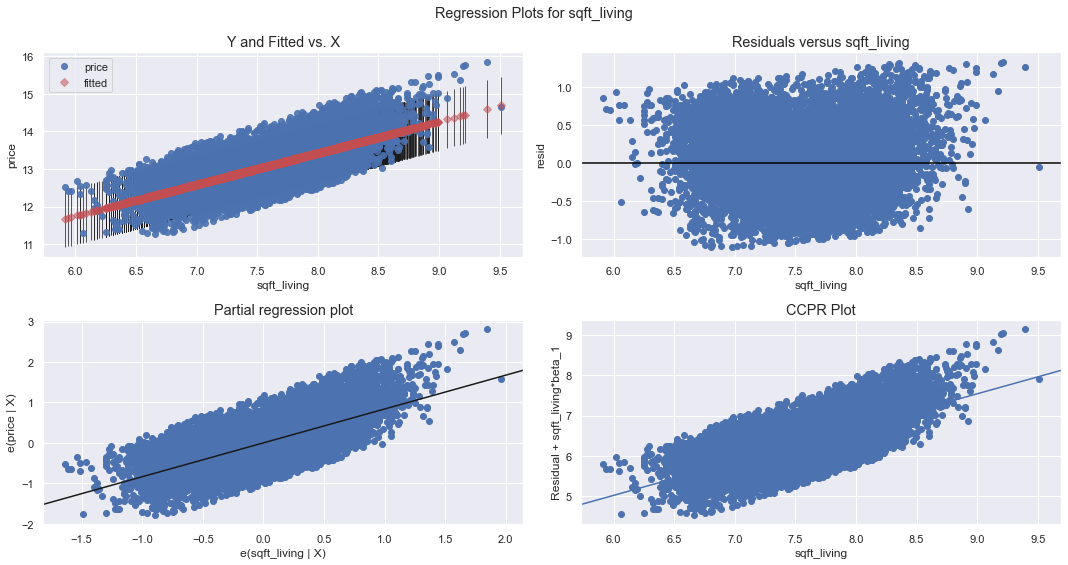

In [149]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "sqft_living", fig=fig)
plt.show()

In [190]:
#let's add the other continous variable "sqft_lot" and see if this improves the R2
label = "price"
y = df_mod.price
x = df_mod[["sqft_living", "sqft_lot"]].assign(const=1)
model = sm.OLS(y,x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.463
Model:                            OLS   Adj. R-squared:                  0.463
Method:                 Least Squares   F-statistic:                     9303.
Date:                Sun, 26 Mar 2023   Prob (F-statistic):               0.00
Time:                        08:59:32   Log-Likelihood:                -10081.
No. Observations:               21597   AIC:                         2.017e+04
Df Residuals:                   21594   BIC:                         2.019e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
sqft_living     0.8746      0.007    133.555      

From the summary, the model is only able to account for a total variation of 46% in the dependent variable while the rest 54% remain unaccounted for. However the model has improved by 1% with the addition of sqft_lit

In [ ]:
#let's test the prediction column

Let's check for model accuracy

In [180]:
Y = df_mod.price.values
feature_cols = ["sqft_living","sqft_lot"]
X = df_mod[feature_cols]

In [181]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X, Y, random_state=3)

In [182]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [183]:
accuracy = regressor.score(x_test, y_test)
"Accuracy: {}%".format(int(round(accuracy * 100)))

'Accuracy: 45%'

In [184]:
#let's create a prediction column based on the model
df_mod["predictions"] = results.fittedvalues
df_mod

,id,price,bedrooms,sqft_living,sqft_lot,floors,condition,grade,predictions
0,7129300520,12.31,3,7.07,8.64,1,3,7,12.65
1,6414100192,13.20,3,7.85,8.89,2,3,7,13.32
2,5631500400,12.10,2,6.65,9.21,1,3,6,12.25
3,2487200875,13.31,4,7.58,8.52,1,5,7,13.10
4,1954400510,13.14,3,7.43,9.00,1,3,8,12.94
...,...,...,...,...,...,...,...,...,...
21592,263000018,12.79,3,7.33,7.03,3,3,8,12.96
21593,6600060120,12.90,4,7.75,8.67,2,3,8,13.24
21594,1523300141,12.90,2,6.93,7.21,2,3,7,12.60
21595,291310100,12.90,3,7.38,7.78,2,3,8,12.96


In [185]:
print(results.predict([7.07,8.64,1]))

[12.64642298]


In [ ]:
#shows same prediction value as what we have on the first row

In [ ]:
#The model needs to be improved, before that let's add in the categorical data and see how the model behaves

In [186]:
#let's explore grade
print(df_mod[["bedrooms","floors","condition","grade"]].describe())

       bedrooms    floors  condition     grade
count  21597.00  21597.00   21597.00  21597.00
mean       3.37      1.45       3.41      7.66
std        0.93      0.55       0.65      1.17
min        1.00      1.00       1.00      3.00
25%        3.00      1.00       3.00      7.00
50%        3.00      1.00       3.00      7.00
75%        4.00      2.00       4.00      8.00
max       33.00      3.00       5.00     13.00


In [187]:
print("Number of Bedroom unique values present", df_mod['bedrooms'].nunique())
print("Number of floors unique values present", df_mod['floors'].nunique())
print("Number of conditions unique values present", df_mod['condition'].nunique())
print("Number of grade unique values present", df_mod['grade'].nunique())

Number of Bedroom unique values present 12
Number of floors unique values present 3
Number of conditions unique values present 5
Number of grade unique values present 11


Let's transform the categorical columns by:
1. Label encoding
2. Creating dummy variables/one-hot-encoding

In [188]:
df_mod = pd.get_dummies(df_mod,columns=["bedrooms"], prefix = "bedrooms", drop_first=True)
df_mod = pd.get_dummies(df_mod,columns=["floors"], prefix = "floors", drop_first=True)
df_mod = pd.get_dummies(df_mod,columns=["condition"], prefix = "condition", drop_first=True)
df_mod = pd.get_dummies(df_mod,columns=["grade"], prefix = "grade", drop_first=True)
df_mod.head()

,id,price,sqft_living,sqft_lot,predictions,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,...,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13
0,7129300520,12.31,7.07,8.64,12.65,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,6414100192,13.20,7.85,8.89,13.32,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,5631500400,12.10,6.65,9.21,12.25,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,2487200875,13.31,7.58,8.52,13.10,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1954400510,13.14,7.43,9.00,12.94,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [193]:
x = df_mod.drop(columns=[label, "predictions", "id"]).assign(const=1)
results = sm.OLS(y, x).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.589
Model:                            OLS   Adj. R-squared:                  0.588
Method:                 Least Squares   F-statistic:                     1065.
Date:                Sun, 26 Mar 2023   Prob (F-statistic):               0.00
Time:                        09:05:52   Log-Likelihood:                -7195.4
No. Observations:               21597   AIC:                         1.445e+04
Df Residuals:                   21567   BIC:                         1.469e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
sqft_living     0.5757      0.011     53.716      

Great we see that the model does improve to R-squared to 59% when we add in the categorical data
We also observe that the data is symmetrical with a very slight tendency towards the right but it's very small to be significant.

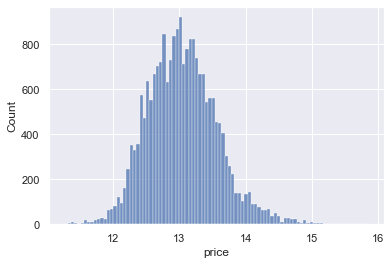

In [194]:
sns.histplot(df_mod.price);

Perform a Train-Test Split
Fit a linear regression on the training dat

In [204]:
from sklearn.model_selection import train_test_split
X = df_mod.drop("price", axis=1)
y = df_mod["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [205]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

In [206]:
linreg.fit(X_train, y_train)

LinearRegression()

Evaluate and Validate Model

In [207]:
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [ ]:
Calculate Mean Squared Error (MSE)

In [208]:
from sklearn.metrics import mean_squared_error
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squared Error:', train_mse)
print('Test Mean Squared Error: ', test_mse)

Train Mean Squared Error: 0.1138816185667106
Test Mean Squared Error:  0.11433987779287012


In [ ]:
# The test error is not that significantly different from the train meaning that the model is able to generalize future cases 
#well

As Train-split test is dependent on the particular split selected, it becomes abit unrealiable since the results will change with every random selected split. To help with this I'll use a K-Fold cross-validation which works by splitting the data ito K equal sections of data.

In [209]:
from sklearn.model_selection import cross_val_score

cross_val_score(linreg, X, y)

array([0.57764098, 0.57608169, 0.56976068, 0.58446757, 0.62216642])

In [210]:
#We'll set our split to 10
cross_val_score(linreg, X, y, cv=10)

array([0.56203524, 0.59219185, 0.55938406, 0.59044598, 0.55035985,
       0.5877099 , 0.583878  , 0.58638939, 0.58451895, 0.65530728])

In [211]:
#let's use MSE instead of R-Squared
cross_val_score(linreg, X, y, scoring="neg_mean_squared_error")

array([-0.12167563, -0.11704371, -0.11466045, -0.11996233, -0.09927256])

In [212]:
#let's customize the metrics
from sklearn.model_selection import cross_validate

cross_validate(linreg, X, y)["test_score"]

array([0.57764098, 0.57608169, 0.56976068, 0.58446757, 0.62216642])

In [213]:
cross_validate(linreg, X, y)

{'fit_time': array([0.01598811, 0.02068686, 0.02086711, 0.01695585, 0.01495981]),
 'score_time': array([0.00395775, 0.00316119, 0.0031085 , 0.0029912 , 0.00317597]),
 'test_score': array([0.57764098, 0.57608169, 0.56976068, 0.58446757, 0.62216642])}

In [214]:
#let's check for both MSE and R2
cross_validate(linreg, X, y, scoring=["r2", "neg_mean_squared_error"])

{'fit_time': array([0.02194595, 0.0209446 , 0.02194262, 0.01595688, 0.0159626 ]),
 'score_time': array([0.00897336, 0.0039897 , 0.00398803, 0.00398874, 0.00498152]),
 'test_r2': array([0.57764098, 0.57608169, 0.56976068, 0.58446757, 0.62216642]),
 'test_neg_mean_squared_error': array([-0.12167563, -0.11704371, -0.11466045, -0.11996233, -0.09927256])}

In [215]:
#let's check for overfitting
cross_validate(linreg, X, y, return_train_score=True)

{'fit_time': array([0.02094316, 0.02059126, 0.01994443, 0.01598573, 0.01604652]),
 'score_time': array([0.00264215, 0.0039885 , 0.00399137, 0.00296378, 0.00390005]),
 'test_score': array([0.57764098, 0.57608169, 0.56976068, 0.58446757, 0.62216642]),
 'train_score': array([0.59166262, 0.59193101, 0.59317677, 0.58981327, 0.57929355])}

In [ ]:
#interesting that the test_score is smaller that the train_score. As there is no much significant difference between the two we
#know that we are not overfitting

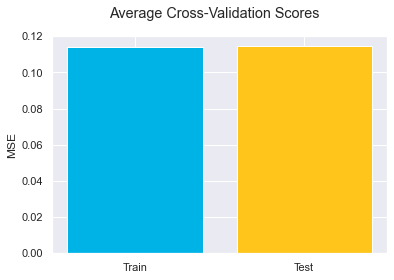

In [218]:
cross_val_results = cross_validate(linreg, X, y, scoring="neg_mean_squared_error", return_train_score=True)
# Negative signs in front to convert back to MSE from -MSE
train_avg = -cross_val_results["train_score"].mean()
test_avg = -cross_val_results["test_score"].mean()
labels = ["Train", "Test"]
colors = ["#00B3E6", "#FFC51B"]
fig, ax = plt.subplots()
ax.bar(labels, [train_avg, test_avg], color=colors)
ax.set_ylabel("MSE")
fig.suptitle("Average Cross-Validation Scores");

There is no significance differece between Train_score and Test_score 

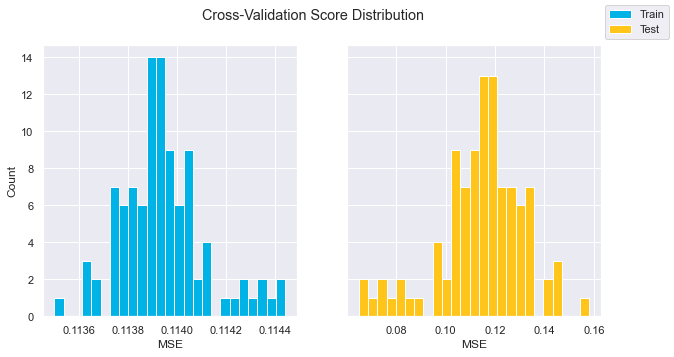

In [219]:
cross_val_results = cross_validate(linreg, X, y, cv=100, scoring="neg_mean_squared_error", return_train_score=True)
train_scores = -cross_val_results["train_score"]
test_scores = -cross_val_results["test_score"]

fig, (left, right) = plt.subplots(ncols=2, figsize=(10,5), sharey=True)
bins=25
left.hist(train_scores, label=labels[0], bins=bins, color=colors[0])
left.set_ylabel("Count")
left.set_xlabel("MSE")
right.hist(test_scores, label=labels[1], bins=bins, color=colors[1])
right.set_xlabel("MSE")
fig.suptitle("Cross-Validation Score Distribution")
fig.legend();

Trying to improve the model by Interactions

In [225]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
regression = LinearRegression()
crossvalidation = KFold(n_splits=10, shuffle=True, random_state=1)
baseline = np.mean(cross_val_score(regression, X, y, scoring='r2', cv=crossvalidation))
baseline

0.5870493676342268

In [ ]:
#Baseline is still same as initially observed

In [226]:
from itertools import combinations

In [227]:
from itertools import combinations

interactions = []

feat_combinations = combinations(X.columns, 2)

data = X.copy()
for i, (a, b) in enumerate(feat_combinations):
    data['interaction'] = data[a] * data[b]
    score = np.mean(cross_val_score(regression, data, y, scoring='r2', cv=crossvalidation))
    if score > baseline:
        interactions.append((a, b, round(score,3)))
    
    if i % 50 == 0:
        print(i)
            
print('Top 3 interactions: %s' %sorted(interactions, key=lambda inter: inter[2], reverse=True)[:3])

0
50
100
150
200
250
300
350
400
450
Top 3 interactions: [('floors_2', 'condition_3', 0.591), ('sqft_living', 'predictions', 0.59), ('floors_2', 'condition_5', 0.59)]


In [228]:

final = x.copy()
df_inter_sm = sm.add_constant(final)
model = sm.OLS(y,final).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.589
Model:                            OLS   Adj. R-squared:                  0.588
Method:                 Least Squares   F-statistic:                     1065.
Date:                Sun, 26 Mar 2023   Prob (F-statistic):               0.00
Time:                        11:41:22   Log-Likelihood:                -7195.4
No. Observations:               21597   AIC:                         1.445e+04
Df Residuals:                   21567   BIC:                         1.469e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
sqft_living     0.5757      0.011     53.716      

The model still remains the same even after building a model with interactions

In [ ]:
Looking at Bias-Variance Tradeoff

In [231]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

In [233]:
# Training set predictions
X_train_predictions = linreg.predict(X_train)

# Test set predictions 
X_test_predictions = linreg.predict(X_test)

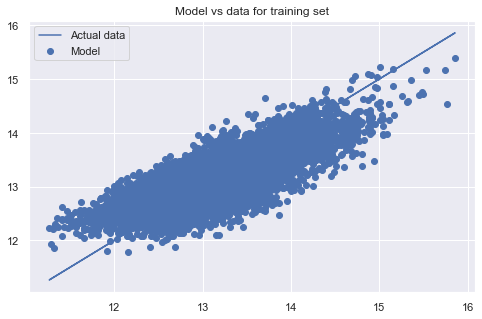

In [237]:
plt.figure(figsize=(8, 5))
plt.scatter(y_train, X_train_predictions, label='Model')
plt.plot(y_train, y_train, label='Actual data')
plt.title('Model vs data for training set')
plt.legend();

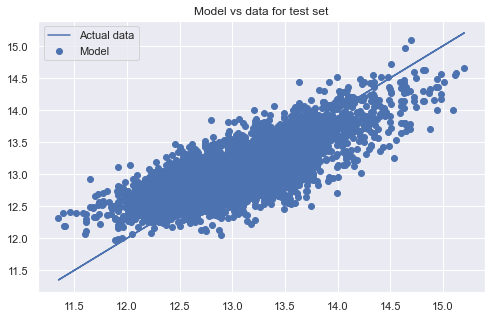

In [236]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, X_test_predictions, label='Model')
plt.plot(y_test, y_test, label='Actual data')
plt.title('Model vs data for test set')
plt.legend();

In [229]:
import numpy as np
def bias(y, y_hat):
    return np.mean(y_hat - y)

In [230]:
def variance(y_hat):
    return np.mean([yi**2 for yi in y_hat]) - np.mean(y_hat)**2

In [234]:
# Bias and variance for training set 
b = bias(y_train, X_train_predictions) 
v = variance(X_train_predictions) 
print('Train bias: {} \nTrain variance: {}'.format(b, v))

Train bias: 4.134633132394236e-17 
Train variance: 0.16304818835004653


In [235]:
# Bias and variance for test set 
b = bias(y_test, X_test_predictions) 
v = variance(X_test_predictions) 
print('Test bias: {} \nTest variance: {}'.format(b, v))

Test bias: 0.0013848834907673557 
Test variance: 0.1605880164739517


In [ ]:
From the above, our model has a relatively low bias and variance, therefore predictions will be accurate